<h1><center>Pandas (Dataframe)</center></h1>

●MSSQL TABLE轉DataFrame

●HTML TABLE轉DataFrame

●欄位條件篩選簡單情境

●DataFrame存成CSV

●DataFrame存成Json

●int ⇄ float and string ⇄ value 轉換

●DataFrame - group-by & sum & pivot & agg

●apply規則原理(表格直接引入Function)

●apply基本應用

●apply進階應用

●歸一化，均值 and 最小最大值

●計算NaN空值

●找唯一值

●獲取列與特定值匹配的行結果與索引

●精確and模糊字串匹配

●排序

●NaN空值處理，補0或移除

    ●A.Pandas 使用 DataFrame.notna() 方法刪除帶有 NaN 的列

    ●B.Pandas 使用 DataFrame.dropna() 方法只刪除所有行都是 NaN 值的列

    ●C.Pandas 使用 DataFrame.dropna() 方法僅在指定行的值為 NaN 的情況下才刪除列

    ●D.Pandas 使用 DataFrame.dropna() 方法刪除任何有 NaN 值的列

●Dataframe行列旋轉

●計算兩日期相隔的天數

●兩個日期時間相隔的差

●推算過x年/日後的準確日期為何

●One hot encoding

●ICD code 轉固定碼數

●描述性統計(count unique top req mean std min 25% 50% 75% max ..)

●Dataframe給定欄位直接訓練model

●資料正規化(疾病矩陣)

<h1><center>SQL TABLE轉DataFrame</center></h1>

In [1]:
import pyodbc
import pandas as pd
server = 'LAPTOP-VFEIS9GU'
database = 'Eat_Out'
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database)
cursor = cnxn.cursor()

query = "SELECT * FROM Eat_Out2;"
df = pd.read_sql(query, cnxn)
df

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):

#     print(df)

,id,Category_Num,Source_Num,Category,Source,Name,Weight,Unit,Energy(kcal),Carbohydrate(g),...,Trans_fat(g),Protein(g),Sodium_Na(mg),Potassium_K(mg),Cholesterol(mg),Vitamin_A(%),Vitamin_C(%),Calcium_Ca(%),Iron_Fe(%),caffeine(mg)
0,1,2,1,便利超商,全家,（廚）老媽拌麵麻辣,404.0,克,1340.0,247.6,...,NULL,45.6,5292.0,NULL,NULL,NULL,NULL,NULL,NULL,NULL
1,2,2,1,便利超商,全家,台酒花雕酸菜牛肉麵,200.0,克,614.4,63.2,...,NULL,20.2,2414.0,NULL,NULL,NULL,NULL,NULL,NULL,NULL
2,3,2,1,便利超商,全家,大乾麵蔥燒牛肉,95.0,克,442.2,51.5,...,NULL,9.1,1638.0,NULL,NULL,NULL,NULL,NULL,NULL,NULL
3,4,2,1,便利超商,全家,珍保玉筍,120.0,克,297.8,16.0,...,NULL,2.2,1332.0,NULL,NULL,NULL,NULL,NULL,NULL,NULL
4,5,2,1,便利超商,全家,甜酒豆腐乳,200.0,克,420.0,58.0,...,NULL,20.0,5900.0,NULL,NULL,NULL,NULL,NULL,NULL,NULL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7890,7891,6,46,食品廠牌,黑橋牌,黑豬條子肉乾,100.0,克,288.0,32.0,...,NULL,21.0,1190.0,NULL,NULL,NULL,NULL,NULL,NULL,NULL
7891,7892,6,46,食品廠牌,黑橋牌,高梁酒香腸,35.0,克,139.0,5.0,...,NULL,5.0,339.0,NULL,NULL,NULL,NULL,NULL,NULL,NULL
7892,7893,6,46,食品廠牌,黑橋牌,一口小香腸,40.0,克,166.0,6.0,...,NULL,7.0,0.0,NULL,NULL,NULL,NULL,NULL,NULL,NULL
7893,7894,6,46,食品廠牌,黑橋牌,原味豬肉香腸,100.0,克,400.0,16.0,...,NULL,16.0,860.0,NULL,NULL,NULL,NULL,NULL,NULL,NULL


In [2]:
#看欄位
for column in df:
    print(column)

id
Category_Num
Source_Num
Category
Source
Name
Weight
Unit
Energy(kcal)
Carbohydrate(g)
Dietary_fiber(g)
Sugars_Tota_NLEA(g)
Total_lipid_fat(g)
Saturated_fat(g)
Multiple_non_fat(g)
Monounsaturated fat(g)
Trans_fat(g)
Protein(g)
Sodium_Na(mg)
Potassium_K(mg)
Cholesterol(mg)
Vitamin_A(%)
Vitamin_C(%)
Calcium_Ca(%)
Iron_Fe(%)
caffeine(mg)


<h1><center>HTML TABLE轉DataFrame</center></h1>

In [3]:
import pandas as pd
from lxml import etree
bus_table = pd.read_html("https://www.ubus.com.tw/Booking/FareInquiry")
 
bus_df = bus_table[0]  #讀取第一個表格
bus_df.columns = ["路線名稱", "優惠時段", "原價時段", "半票票價", "軍優票價", "去回票價"] #換置一維欄位名
bus_df

,路線名稱,優惠時段,原價時段,半票票價,軍優票價,去回票價
0,【1610】台北－高雄,535元,590元,290元,560元,"1,120元"
1,【1611】台北－台南,430元,480元,265元,-元,930元
2,【1612】台北－北二高－台南,430元,480元,265元,-元,930元
3,【1612】台北－北二高－北港路,400元,420元,220元,-元,-元
4,【1613】台北－屏東,560元,620元,325元,600元,"1,200元"
5,【1615】台北－彰化,290元,320元,165元,315元,630元
6,【1616】台北－員林,320元,350元,175元,345元,690元
7,【1617】台北－東勢,300元,330元,165元,320元,640元
8,【1617】台北－豐原,270元,285元,140元,-元,-元
9,【1618】台北－嘉義,400元,440元,220元,-元,860元


<h1><center>簡單情境</center></h1>

In [33]:
import pandas as pd
import numpy as np

df=pd.DataFrame({
                'ID':
                    {0:'Hisila',
                     1:'Shristi',
                     2:'Zeppy',
                     3:'Alina',
                     4:'Kevin',
                     5:'Kevin',
                     6:'Hisila'
                    },
                'in_date': 
                    {0: '2019-11-20', 
                    1: '2019-11-20', 
                    2: '2020-02-05',
                    3: '2020-03-10',
                    4: '2020-04-16',
                    5: '2020-05-01',
                    6: '2020-05-01'
                    },
                'total_day': 
                    {0:20, 
                    1: 40, 
                    2: 30, 
                    3: 50, 
                    4: 60,
                    5: 30,
                    6: 20
                    },
                'cost': 
                    {0:200, 
                    1: 400, 
                    2: 300, 
                    3: 500, 
                    4: 600,
                    5: 300,
                    6: 200
                    },
                })

df['in_date'] = pd.to_datetime(df['in_date'])

df

,ID,in_date,total_day,cost
0,Hisila,2019-11-20,20,200
1,Shristi,2019-11-20,40,400
2,Zeppy,2020-02-05,30,300
3,Alina,2020-03-10,50,500
4,Kevin,2020-04-16,60,600
5,Kevin,2020-05-01,30,300
6,Hisila,2020-05-01,20,200


In [5]:
#我要找ID為Kevin、Zeppy、Alina
filt_value = ['Kevin', 'Zeppy', 'Alina']

filt = df['ID'].isin(filt_value)
df=df.loc[filt, ['ID', 'in_date', 'total_day','cost']]
df

,ID,in_date,total_day,cost
2,Zeppy,2020-02-05,30,300
3,Alina,2020-03-10,50,500
4,Kevin,2020-04-16,60,600
5,Kevin,2020-05-01,30,300


In [7]:
#我要找花費>400,並且新增一欄作為標記。
df['new_Row'] = ["true,>400" if a >=400 else "False" for a in df['cost']] 

df

,ID,in_date,total_day,cost,new_Row
0,Hisila,2019-11-20,20,200,False
1,Shristi,2019-11-20,40,400,"true,>400"
2,Zeppy,2020-02-05,30,300,False
3,Alina,2020-03-10,50,500,"true,>400"
4,Kevin,2020-04-16,60,600,"true,>400"
5,Kevin,2020-05-01,30,300,False
6,Hisila,2020-05-01,20,200,False


In [8]:
import operator
operations={
    '<':operator.lt,
    '>':operator.gt,
    '==':operator.eq,
    '<=':operator.le,
    '>=':operator.ge,
    '!=':operator.ne
}

In [10]:
#傳入我要找日期為2020年以前,且day>10,且cost>150,且new_Row=False的資訊
a1=['in_date',"2020-01-01",'<','total_day',10,'>','cost',150,'>','new_Row','False','==','ID','Hisila','==']
a2=['in_date','2020-04-01','>']

# a2=['<','>','>','==','==']

# flg1 = df[a1[0]] < a1[1]
# flg2 = df[a1[2]] > a1[3]
# flg3 = df[a1[4]] > a1[5]
# flg4 = df[a1[6]] == a1[7]
# if a1[8]!='':
#     flg5 = df[a1[8]] == a1[9]
# else:
#     pass

# df  = df[flg1 & flg2 & flg3 & flg4 & flg5]

flg1 = operations[a1[2]](df[a1[0]],a1[1]) | operations[a2[2]](df[a2[0]],a2[1])
flg1 = operations[a1[2]](df[a1[0]],a1[1]) 
flg2 = operations[a1[5]](df[a1[3]],a1[4])
flg3 = operations[a1[8]](df[a1[6]],a1[7])
flg4 = operations[a1[11]](df[a1[9]],a1[10])
flg5 = operations[a1[14]](df[a1[12]],a1[13])
df2  = df[flg1 & flg2 & flg3 & flg4 & flg5]

print("原始表格：\n",df)
df2

原始表格：
         ID    in_date  total_day  cost    new_Row
0   Hisila 2019-11-20         20   200      False
1  Shristi 2019-11-20         40   400  true,>400
2    Zeppy 2020-02-05         30   300      False
3    Alina 2020-03-10         50   500  true,>400
4    Kevin 2020-04-16         60   600  true,>400
5    Kevin 2020-05-01         30   300      False
6   Hisila 2020-05-01         20   200      False


,ID,in_date,total_day,cost,new_Row
0,Hisila,2019-11-20,20,200,False


In [234]:
# df3=df.query("in_date<'2020-01-01'| in_date>'2020-04-01' & total_day>10 & cost>150 & new_Row=='False' & ID=='Hisila'")
# df3=df.query("in_date<'2020-01-01'& in_date>'2020-04-01' & total_day>10 & cost>150 & new_Row=='False' & ID=='Hisila'")
str1="in_date<'2020-01-01'| in_date>'2020-04-01'"
str2="total_day>10 & cost>150 & new_Row=='False' & ID=='Hisila'"

df3=df.query(str1).query(str2)
df3

,ID,in_date,total_day,cost,new_Row
0,Hisila,2019-11-20,20,200,False
6,Hisila,2020-05-01,20,200,False


<h1><center>DataFrame存成CSV</center></h1>

In [11]:
df.to_csv("data2.csv", index = True)

<h1><center>CSV匯入DataFrame</center></h1>

In [12]:
import pandas as pd

df = pd.read_csv ('data3.csv')
print(df)

       ID  157.9  220  239.1  320.3
0   Alice      1    1      1      0
1     Bee      1    0      0      0
2    Hank      0    1      0      0
3  Steven      0    1      0      1
4    Tony      0    0      0      1


<h1><center>DataFrame存成json</center></h1>

In [13]:
js = df.to_json(orient = 'records') #'records' & 'columns' & 'index' &'split' & 'table'
print(js)

[{"ID":"Alice","157.9":1,"220":1,"239.1":1,"320.3":0},{"ID":"Bee","157.9":1,"220":0,"239.1":0,"320.3":0},{"ID":"Hank","157.9":0,"220":1,"239.1":0,"320.3":0},{"ID":"Steven","157.9":0,"220":1,"239.1":0,"320.3":1},{"ID":"Tony","157.9":0,"220":0,"239.1":0,"320.3":1}]


<h1><center>int ⇄ float and  str ⇄ value</center></h1>

In [14]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.rand(5, 5) * 5)

print(df)
print()
print(df.astype(int))
print()
print(df.round(0).astype(int))

          0         1         2         3         4
0  1.999380  2.062814  4.276305  2.464819  3.008072
1  4.332628  2.637140  4.435462  0.025436  4.587330
2  2.543875  2.134885  4.190148  3.128285  3.862467
3  3.535702  3.336963  2.609631  3.635540  2.548845
4  4.506635  3.440795  2.635207  3.001565  3.296190

   0  1  2  3  4
0  1  2  4  2  3
1  4  2  4  0  4
2  2  2  4  3  3
3  3  3  2  3  2
4  4  3  2  3  3

   0  1  2  3  4
0  2  2  4  2  3
1  4  3  4  0  5
2  3  2  4  3  4
3  4  3  3  4  3
4  5  3  3  3  3


In [15]:
s = pd.Series(['123', '2', '-3'])
print(pd.to_numeric(s,downcast='integer'))

0    123
1      2
2     -3
dtype: int8


<h1><center>DataFrame - group-by and sum and pivot and agg</center></h1>

In [16]:
import pandas as pd
df = pd.DataFrame({'Date': ['2019-11-20', '2019-11-20', '2020-02-05', '2020-02-05'],
                   'ID': ['Hank', 'Hank', 'Kevin', 'Kevin'],
                   'cost': [200, 400, 300, 600]})
print(df)
print()
print(df.groupby(by=['ID','Date']).sum().groupby(level=[0]).cumsum())
print()
print (df.groupby(['ID','Date'],as_index = False).sum().pivot('ID','Date').fillna(0))

         Date     ID  cost
0  2019-11-20   Hank   200
1  2019-11-20   Hank   400
2  2020-02-05  Kevin   300
3  2020-02-05  Kevin   600

                  cost
ID    Date            
Hank  2019-11-20   600
Kevin 2020-02-05   900

            cost           
Date  2019-11-20 2020-02-05
ID                         
Hank       600.0        0.0
Kevin        0.0      900.0


In [17]:
print(df.groupby(by=['ID']).sum())
print()
print(df.groupby(['ID'])['cost'].agg('sum'))

       cost
ID         
Hank    600
Kevin   900

ID
Hank     600
Kevin    900
Name: cost, dtype: int64


<h1><center>apply規則原理(表格直接引入Function)</center></h1>

In [18]:
import pandas as pd
import numpy as np

df = pd.DataFrame([
                    [5,6,7,8],
                    [1,9,12,14],
                    [4,8,10,6]
                    ],
                  columns = ['a','b','c','d'])

def fun1(a):
    return a + 1 

df_new  = df.apply(fun1, axis = 1)

print("The original dataframe:")
print(df)
print("The new dataframe:")
print(df_new)

The original dataframe:
   a  b   c   d
0  5  6   7   8
1  1  9  12  14
2  4  8  10   6
The new dataframe:
   a   b   c   d
0  6   7   8   9
1  2  10  13  15
2  5   9  11   7


In [19]:
import pandas as pd
import numpy as np

df = pd.DataFrame([
                    [5,6,7,8],
                    [1,9,12,14],
                    [4,8,10,6]
                    ],
                  columns = ['a','b','c','d'])

print("The original dataframe:")
print(df)

def func(x):
    return x[0] + x[1]

df['new_e']  = df.apply(func, axis = 1)

print("The new dataframe:")
print(df)

The original dataframe:
   a  b   c   d
0  5  6   7   8
1  1  9  12  14
2  4  8  10   6
The new dataframe:
   a  b   c   d  new_e
0  5  6   7   8     11
1  1  9  12  14     10
2  4  8  10   6     12


<h1><center>apply基本應用</center></h1>

In [20]:
import pandas as pd

df = pd.DataFrame(
    {
      'Name':   ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O'],
      'Sex':    ['M', 'M', 'M', 'F', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'M', 'F', 'M', 'M'],
      'Age':    [38, 28, 31, 34, 28, 28, 36, 33, 22, 39, 22, 24, 31, 29, 22],
      'Height': [1.74, 1.51, 1.67, 1.87, 1.8, 1.51, 1.85, 1.89, 1.81, 1.72, 1.75, 1.64, 1.9, 1.62, 1.61],
      'Weight': [45, 63, 39, 45, 67, 66, 53, 45, 72, 46, 58, 44, 73, 70, 51],
    }
)
df

,Name,Sex,Age,Height,Weight
0,A,M,38,1.74,45
1,B,M,28,1.51,63
2,C,M,31,1.67,39
3,D,F,34,1.87,45
4,E,F,28,1.80,67
5,F,M,28,1.51,66
6,G,F,36,1.85,53
7,H,M,33,1.89,45
8,I,F,22,1.81,72
9,J,M,39,1.72,46


In [21]:
df_eg1 = df.copy()

def BMI(r):
     return round(r['Weight'] / (r['Height'] ** 2), ndigits=2)

df_eg1['BMI_apply1'] = df_eg1.apply(BMI, axis=1)

df_eg1

,Name,Sex,Age,Height,Weight,BMI_apply1
0,A,M,38,1.74,45,14.86
1,B,M,28,1.51,63,27.63
2,C,M,31,1.67,39,13.98
3,D,F,34,1.87,45,12.87
4,E,F,28,1.80,67,20.68
5,F,M,28,1.51,66,28.95
6,G,F,36,1.85,53,15.49
7,H,M,33,1.89,45,12.60
8,I,F,22,1.81,72,21.98
9,J,M,39,1.72,46,15.55


In [22]:
import math
import random

df_eg2 = df.copy()

def many_columns(x):
      # 第 1 個列
    x['Age_group'] = math.floor(x['Age'] / 10) * 10

     # 第 2 個列
    if x['Height'] > 1.7:
        x['Height_group'] = 'Tall'
    else:
        x['Height_group'] = 'Short'

    # 第 3 個列
    x['Random_group'] = random.randint(1,3)

    # 回傳結果
    return x

df_eg2 = df_eg2.apply(many_columns, axis=1)
print(df_eg2)

   Name Sex  Age  Height  Weight  Age_group Height_group  Random_group
0     A   M   38    1.74      45         30         Tall             3
1     B   M   28    1.51      63         20        Short             3
2     C   M   31    1.67      39         30        Short             2
3     D   F   34    1.87      45         30         Tall             1
4     E   F   28    1.80      67         20         Tall             2
5     F   M   28    1.51      66         20        Short             2
6     G   F   36    1.85      53         30         Tall             3
7     H   M   33    1.89      45         30         Tall             2
8     I   F   22    1.81      72         20         Tall             1
9     J   M   39    1.72      46         30         Tall             3
10    K   M   22    1.75      58         20         Tall             2
11    L   M   24    1.64      44         20        Short             1
12    M   F   31    1.90      73         30         Tall             1
13    

<h1><center>apply進階應用</center></h1>

In [23]:
class Person:
    def __init__(self, sex, height, weight, age):
        self.sex = sex
        self.height = height
        self.weight = weight
        self.age = age
  
    def describe(self):
        if self.sex == 'M':
            sex_describe = '男生'
        else:
            sex_describe = '女生'

        if self.height > 1.7:
            height_describe = '高高'
        else:
            height_describe = '矮矮'
        if self.weight > 60:
            weight_describe = '胖胖'
        else:
            weight_describe = '瘦瘦'
        if self.age > 30:
            age_describe = '壯年'
        else:
            age_describe = '少年'
        return '我是一個' + height_describe + weight_describe + '的' + age_describe + sex_describe

In [24]:
df_eg3 = df.copy()

df_eg3['Object'] = df_eg3.apply(lambda x: Person(x['Sex'],x['Height'],x['Weight'],x['Age']), axis=1)
df_eg3['Object_describe'] = df_eg3.apply(lambda x: x['Object'].describe(), axis=1)

print(df_eg3)

   Name Sex  Age  Height  Weight  \
0     A   M   38    1.74      45   
1     B   M   28    1.51      63   
2     C   M   31    1.67      39   
3     D   F   34    1.87      45   
4     E   F   28    1.80      67   
5     F   M   28    1.51      66   
6     G   F   36    1.85      53   
7     H   M   33    1.89      45   
8     I   F   22    1.81      72   
9     J   M   39    1.72      46   
10    K   M   22    1.75      58   
11    L   M   24    1.64      44   
12    M   F   31    1.90      73   
13    N   M   29    1.62      70   
14    O   M   22    1.61      51   

                                            Object Object_describe  
0   <__main__.Person object at 0x000001C3D265DA00>   我是一個高高瘦瘦的壯年男生  
1   <__main__.Person object at 0x000001C3D265DAF0>   我是一個矮矮胖胖的少年男生  
2   <__main__.Person object at 0x000001C3D265D8E0>   我是一個矮矮瘦瘦的壯年男生  
3   <__main__.Person object at 0x000001C3D265DA90>   我是一個高高瘦瘦的壯年女生  
4   <__main__.Person object at 0x000001C3D273A190>   我是一個高高胖胖的少年女生  
5   <__ma

<h1><center>Map語法</center></h1>

In [25]:
print(df)
num_map = {'M': 1, 'F': 2}
df['Sex_new'] = df['Sex'].map(num_map)
df

   Name Sex  Age  Height  Weight
0     A   M   38    1.74      45
1     B   M   28    1.51      63
2     C   M   31    1.67      39
3     D   F   34    1.87      45
4     E   F   28    1.80      67
5     F   M   28    1.51      66
6     G   F   36    1.85      53
7     H   M   33    1.89      45
8     I   F   22    1.81      72
9     J   M   39    1.72      46
10    K   M   22    1.75      58
11    L   M   24    1.64      44
12    M   F   31    1.90      73
13    N   M   29    1.62      70
14    O   M   22    1.61      51


,Name,Sex,Age,Height,Weight,Sex_new
0,A,M,38,1.74,45,1
1,B,M,28,1.51,63,1
2,C,M,31,1.67,39,1
3,D,F,34,1.87,45,2
4,E,F,28,1.80,67,2
5,F,M,28,1.51,66,1
6,G,F,36,1.85,53,2
7,H,M,33,1.89,45,1
8,I,F,22,1.81,72,2
9,J,M,39,1.72,46,1


<h1><center>歸一化，均值 and 最小最大值</center></h1>

<h1><center></center></h1>

In [26]:
import pandas as pd
import numpy as np

np.random.seed(666)

df = pd.DataFrame(np.random.randint(-100,100,size=(20, 4)), columns=list('ABCD'))
print(df)
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

df_mean_norm = mean_norm(df)
df_mean_norm

     A   B   C   D
0   30  73  58 -38
1  -30  58  64  89
2   -9 -49 -40  56
3  -86 -37  44 -54
4  -61 -31  41 -31
5   17 -80  39 -76
6   48 -64  12  76
7   64  -6  74  22
8   75 -84 -23  64
9  -74 -95 -58   3
10 -55  61  92  -6
11  92 -73  42   2
12 -62  26  92 -98
13 -66 -14 -73 -21
14  12 -62  55 -20
15 -43 -17  66 -91
16 -49 -23 -55 -98
17   0 -12 -37  51
18   7  39  99 -46
19  27  75  47  68


,A,B,C,D
0,0.713492,1.621061,0.566938,-0.507282
1,-0.408645,1.347079,0.676491,1.598106
2,-0.015897,-0.607327,-1.222431,1.051036
3,-1.455973,-0.388141,0.311314,-0.772528
4,-0.988416,-0.278548,0.256537,-0.391237
5,0.470363,-1.173557,0.220019,-1.137241
6,1.050133,-0.881309,-0.272970,1.382593
7,1.349370,0.178088,0.859080,0.487389
8,1.555095,-1.246618,-0.912030,1.183659
9,-1.231546,-1.447539,-1.551091,0.172410


In [31]:
import pandas as pd
import numpy as np

np.random.seed(0)

df = pd.DataFrame(np.random.randint(-100,100,size=(20, 4)), columns=list('ABCD'))

print(df)

def minmax_norm(df_input):
    return (df - df.min()) / ( df.max() - df.min())

df_minmax_norm = minmax_norm(df)

df_minmax_norm

     A   B   C   D
0   72 -53  17  92
1  -33  95   3 -91
2  -79 -64 -13 -30
3  -12  40 -42  93
4  -61 -13  74 -12
5  -19  65 -75 -23
6  -28 -91  48  15
7   97 -21  75  92
8  -18  -1  77 -71
9   47  47  42  67
10 -68  93 -91  85
11  27 -68 -69  51
12  63  14  83 -72
13 -66  28  28  64
14 -47  33 -62 -83
15 -21  32   5 -58
16  86 -69  20 -99
17 -35  69 -43 -65
18   2  19 -89  74
19 -18  -9  28  42


,A,B,C,D
0,0.857955,0.204301,0.620690,0.994792
1,0.261364,1.000000,0.540230,0.041667
2,0.000000,0.145161,0.448276,0.359375
3,0.380682,0.704301,0.281609,1.000000
4,0.102273,0.419355,0.948276,0.453125
5,0.340909,0.838710,0.091954,0.395833
6,0.289773,0.000000,0.798851,0.593750
7,1.000000,0.376344,0.954023,0.994792
8,0.346591,0.483871,0.965517,0.145833
9,0.715909,0.741935,0.764368,0.864583


<h1><center>計算NaN空值</center></h1>

In [28]:
df.isna().sum()

A    0
B    0
C    0
D    0
dtype: int64

<h1><center>找唯一值</center></h1>

In [34]:
result1 = df.groupby('ID')['cost'].nunique()
result2 = df.groupby('ID')['cost'].unique()
print(result1)
print(result2)

ID
Alina      1
Hisila     1
Kevin      2
Shristi    1
Zeppy      1
Name: cost, dtype: int64
ID
Alina           [500]
Hisila          [200]
Kevin      [600, 300]
Shristi         [400]
Zeppy           [300]
Name: cost, dtype: object


<h1><center>獲取列與特定值匹配的行結果與索引</center></h1>

<h1><center></center></h1>

In [35]:
import pandas as pd
import numpy as np

np.random.seed(2)

df = pd.DataFrame(np.random.randint(1,20,size=(20, 4)), columns=list('ABCD'))
print (df.loc[(df['B'] >= 19) | (df['C'] >= 18)])
print()
idx=df.index[(df['B'] >= 19) | (df['C'] >= 18)]
print("index：",idx)
df

     A   B   C   D
1   12  19  12   9
2    8   3  18  12
8   13  19   5  16
11  14   9  18  10
13   1  19   9  13

index： Int64Index([1, 2, 8, 11, 13], dtype='int64')


,A,B,C,D
0,9,16,14,9
1,12,19,12,9
2,8,3,18,12
3,16,6,8,4
4,7,5,11,12
5,8,7,11,2
6,4,6,5,15
7,7,3,17,15
8,13,19,5,16
9,18,8,15,9


<h1><center>精確and模糊字串匹配</center></h1>

In [36]:
import pandas as pd

df = pd.DataFrame({"Name": ["Hank", 
                            "Tony", 
                            "ekko", 
                            "john", 
                            "queen",
                            "Hank"], 
                    "Type": ["1",
                             "1",
                             "1",
                             "2",
                             "3",
                             "6"]
                    })

print ("Index：",df.index[(df['Name'] == 'Hank')].tolist())
print('----')
print (df.loc[(df['Name'] == 'Hank') & (df['Type'] =='6')])
print('------------------------------------------------------')
print (df.index[df['Name'].str.contains('an')].tolist())
print('----')
print (df.loc[(df['Name'].str.contains('an')) & (df['Type'].str.contains('1'))])

Index： [0, 5]
----
   Name Type
5  Hank    6
------------------------------------------------------
[0, 5]
----
   Name Type
0  Hank    1


<h1><center>排序</center></h1>

In [37]:
import pandas as pd
df = pd.DataFrame({
    'col1': ['g', 't', 'n', 'w', 'n', 'g'],
    'col2': [5, 2, 5, 1, 3, 6],
    'col3': [0, 7, 2, 8,1, 2],
})
print(df.sort_values(by=['col1','col2'], ascending=False)) #ascending升降冪 1.False 2.True

  col1  col2  col3
3    w     1     8
1    t     2     7
2    n     5     2
4    n     3     1
5    g     6     2
0    g     5     0


In [38]:
import numpy as np
import pandas as pd
s = pd.Series([np.nan, 2, 4, 10, 7])
print(s.sort_values(na_position='last')) # na_position NaN升降冪 1.First 2.Last

1     2.0
2     4.0
4     7.0
3    10.0
0     NaN
dtype: float64


<h1><center>NaN空值處理，補0或移除</center></h1>

In [39]:
import pandas as pd
import numpy as np
data = {'name': ['Oliver', 'Harry', 'George', 'Noah'],
        'percentage': [90, 99, 50, 65],
        'grade': [88, np.nan, 95,np.nan]}
df = pd.DataFrame(data)
print(df)
print()
df = df.fillna(0)
print(df)

     name  percentage  grade
0  Oliver          90   88.0
1   Harry          99    NaN
2  George          50   95.0
3    Noah          65    NaN

     name  percentage  grade
0  Oliver          90   88.0
1   Harry          99    0.0
2  George          50   95.0
3    Noah          65    0.0


In [40]:
import pandas as pd
import numpy as np
data = {'name': ['Oliver', 'Harry', 'George', 'Noah'],
        'percentage': [90, 99, 50, 65],
        'grade': [88, np.nan, 95,np.nan]}
df = pd.DataFrame(data)
print(df)
print()
nan_replaced = df.replace(np.nan,0)
nan_replaced = df.replace("Harry","Hank")
print(nan_replaced)

     name  percentage  grade
0  Oliver          90   88.0
1   Harry          99    NaN
2  George          50   95.0
3    Noah          65    NaN

     name  percentage  grade
0  Oliver          90   88.0
1    Hank          99    NaN
2  George          50   95.0
3    Noah          65    NaN


A.Pandas 使用 DataFrame.notna() 方法刪除帶有 NaN 的列

B.Pandas 使用 DataFrame.dropna() 方法只刪除所有行都是 NaN 值的列

C.Pandas 使用 DataFrame.dropna() 方法僅在某一行的值為 NaN 的情況下才刪除列

D.Pandas 使用 DataFrame.dropna() 方法刪除任何有 NaN 值的列

In [41]:
import pandas as pd

roll_no = [501, 502, 503, 504, 505]

data = pd.DataFrame({
    'Name': ['Alice', 'Steven', 'Neesham', 'Chris', None],
    'Age':  [19, None, 18, 21, None],
    'cost': [4000, 5000, None, 3500, None],
    'income': [3000, 2000, 2500, 25000, None],

})
print(data)

      Name   Age    cost   income
0    Alice  19.0  4000.0   3000.0
1   Steven   NaN  5000.0   2000.0
2  Neesham  18.0     NaN   2500.0
3    Chris  21.0  3500.0  25000.0
4     None   NaN     NaN      NaN


In [42]:
print('------------A--------------')
data = data[data['cost'].notna()]
data

------------A--------------


,Name,Age,cost,income
0,Alice,19.0,4000.0,3000.0
1,Steven,NaN,5000.0,2000.0
3,Chris,21.0,3500.0,25000.0


In [43]:
print('------------B--------------')
data = data.dropna(how='all')
data

------------B--------------


,Name,Age,cost,income
0,Alice,19.0,4000.0,3000.0
1,Steven,NaN,5000.0,2000.0
3,Chris,21.0,3500.0,25000.0


In [44]:
print('------------C--------------')
data = data.dropna(subset=["cost"])
print(data)

------------C--------------
     Name   Age    cost   income
0   Alice  19.0  4000.0   3000.0
1  Steven   NaN  5000.0   2000.0
3   Chris  21.0  3500.0  25000.0


In [45]:
print('------------D--------------')
data = data.dropna()
print(data)

------------D--------------
    Name   Age    cost   income
0  Alice  19.0  4000.0   3000.0
3  Chris  21.0  3500.0  25000.0


In [46]:
s = pd.Series([1,2,3,4,5])
roller = s.rolling(window = 3)
cen_roller = s.rolling(window = 3, center=True)

In [47]:
cen_roller.mean()

0    NaN
1    2.0
2    3.0
3    4.0
4    NaN
dtype: float64

<h1><center>行列旋轉</center><h1>

In [48]:
df = pd.DataFrame({'Name': {0: 'John', 1: 'Bob', 2: 'Shiela'},
                   'Course': {0: 'Masters', 1: 'Graduate', 2: 'Graduate'},
                   'Age': {0: 27, 1: 23, 2: 21}})
df

,Name,Course,Age
0,John,Masters,27
1,Bob,Graduate,23
2,Shiela,Graduate,21


In [49]:
print(pd.melt(df, id_vars =['Name'], value_vars =['Course'], var_name ='LALALALALALALA', value_name ='BABABABABABABA'))
print()
print(pd.melt(df, id_vars =['Name'], value_vars =['Course', 'Age']))
print()


     Name LALALALALALALA BABABABABABABA
0    John         Course        Masters
1     Bob         Course       Graduate
2  Shiela         Course       Graduate

     Name variable     value
0    John   Course   Masters
1     Bob   Course  Graduate
2  Shiela   Course  Graduate
3    John      Age        27
4     Bob      Age        23
5  Shiela      Age        21



In [50]:
import pandas as pd
import numpy as np

longframe = pd.DataFrame({'color':['white', 'white', 'white', 'red', 'red', 'red', 'black', 'black', 'black'],
                       'item':['ball', 'pen', 'mug', 'ball', 'pen', 'mug', 'ball', 'pen', 'HANK'],
                       'value': np.random.rand(9)})
print(longframe)
print('------------')
wideframe = longframe.pivot('color', 'item')
print(wideframe)

   color  item     value
0  white  ball  0.045679
1  white   pen  0.983153
2  white   mug  0.441355
3    red  ball  0.504000
4    red   pen  0.323541
5    red   mug  0.259745
6  black  ball  0.386890
7  black   pen  0.832017
8  black  HANK  0.736747
------------
          value                              
item       HANK      ball       mug       pen
color                                        
black  0.736747  0.386890       NaN  0.832017
red         NaN  0.504000  0.259745  0.323541
white       NaN  0.045679  0.441355  0.983153


<h1><center>計算兩日期相隔的天數</center></h1>

In [54]:
class Date:
    def __init__(self, d, m, y):
        self.d = d
        self.m = m
        self.y = y


# 各月的天數
monthDays = [31, 28, 31, 30, 31, 30,
            31, 31, 30, 31, 30, 31]

# 閏年
def countLeapYears(d):

    years = d.y

    if (d.m <= 2):
        years -= 1
        
    return int(years / 4) - int(years / 100) + int(years / 400)


# 計算結果
def getDifference(dt1, dt2):

    # 計算第一個日期 'dt1' 之前的總天數

     # 使用年和日初始化計數
    n1 = dt1.y * 365 + dt1.d

    # 為給定日期的月份添加天數
    for i in range(0, dt1.m - 1):
        n1 += monthDays[i]

    # 因為每個閏年是 366 天，
     # 每閏年加一天
    n1 += countLeapYears(dt1)

    # 同樣，計算 'dt2' 之前的總天數

    n2 = dt2.y * 365 + dt2.d
    for i in range(0, dt2.m - 1):
        n2 += monthDays[i]
    n2 += countLeapYears(dt2)

    # 返回兩個計數之間的差
    return (n2 - n1)

dt1 = Date(7, 2, 1997)
dt2 = Date(13, 12, 2021)

print(getDifference(dt1, dt2), "days")

9075 days


<h1><center>兩個日期之間的差(細至時間)</center></h1>

In [52]:
import datetime
def getTimeDifference(tup):
    a = datetime.datetime(tup[0],tup[1],tup[2],tup[3],tup[4],tup[5])
    b = datetime.datetime(tup[6],tup[7],tup[8],tup[9],tup[10],tup[11])

    # returns a timedelta object
    c = a-b
    print('Difference: ', c)

    # returns (minutes, seconds)
    minutes = divmod(c.total_seconds(), 60)
    print('Total difference in minutes: ', minutes[0], 'minutes',minutes[1], 'seconds')

    # returns the difference of the time of the day (minutes, seconds)
    minutes = divmod(c.seconds, 60)
    print('Total difference in minutes: ', minutes[0], 'minutes',minutes[1], 'seconds')
    
tup=(2017, 6, 21, 18, 25, 30,2017, 5, 16, 8, 21, 10)
getTimeDifference(tup)

Difference:  36 days, 10:04:20
Total difference in minutes:  52444.0 minutes 20.0 seconds
Total difference in minutes:  604 minutes 20 seconds


<h1><center>推算x年日後的日期</center></h1>

In [57]:
from datetime import datetime, timedelta
  
ini_time_for_now = datetime.now()
# a = datetime.datetime(tup[0],tup[1],tup[2],tup[3],tup[4],tup[5])
  
# printing initial_date
print ("initial_date", str(ini_time_for_now))
  
# Calculating future dates
# for two years
future_date_after_2yrs = ini_time_for_now + \
                        timedelta(days = 730)
  
future_date_after_2days = ini_time_for_now + \
                         timedelta(days = 2)
  
# printing calculated future_dates
print('future_date_after_2yrs:', str(future_date_after_2yrs))
print('future_date_after_2days:', str(future_date_after_2days))

initial_date 2021-12-24 14:51:20.509352
future_date_after_2yrs: 2023-12-24 14:51:20.509352
future_date_after_2days: 2021-12-26 14:51:20.509352


<h1><center>One hot encoding</center></h1>

In [58]:
import pandas as pd
import numpy as np

df= pd.DataFrame(
    {
      'Name':   ['Hank', 'Hank', 'Hank', 'Joy', 'Joy', 'Joy', 'Tony', 'Tony', 'Ekko', 'Ekko', 'Ekko', 'Ekko', 'Ming', 'Ming', 'Ming'],
      'state':  ['student', 'worker', 'son', 'teacher', 'student', 'father', 'teacher', 'student', 'son', 'son', 'son', 'son', 'worker', 'teacher', 'father']
    })
print(df)
df = df.join(pd.get_dummies(df))
pd.DataFrame(df)

    Name    state
0   Hank  student
1   Hank   worker
2   Hank      son
3    Joy  teacher
4    Joy  student
5    Joy   father
6   Tony  teacher
7   Tony  student
8   Ekko      son
9   Ekko      son
10  Ekko      son
11  Ekko      son
12  Ming   worker
13  Ming  teacher
14  Ming   father


,Name,state,Name_Ekko,Name_Hank,Name_Joy,Name_Ming,Name_Tony,state_father,state_son,state_student,state_teacher,state_worker
0,Hank,student,0,1,0,0,0,0,0,1,0,0
1,Hank,worker,0,1,0,0,0,0,0,0,0,1
2,Hank,son,0,1,0,0,0,0,1,0,0,0
3,Joy,teacher,0,0,1,0,0,0,0,0,1,0
4,Joy,student,0,0,1,0,0,0,0,1,0,0
5,Joy,father,0,0,1,0,0,1,0,0,0,0
6,Tony,teacher,0,0,0,0,1,0,0,0,1,0
7,Tony,student,0,0,0,0,1,0,0,1,0,0
8,Ekko,son,1,0,0,0,0,0,1,0,0,0
9,Ekko,son,1,0,0,0,0,0,1,0,0,0


<h1><center>ICD轉固定碼數</center></h1>

In [59]:
df = pd.DataFrame(
    {
      'Height': ['A174', '174.0','174.00','1740','1.74','174'],
    })
    
def fun1(a):
    a1=a['Height'].replace('.','')
    num=(5-len(a1))
    if a1.isdigit():
        return a1+'0'*num
    else:
        return a1+'0'*(num+1)

df_new  = df.apply(fun1, axis = 1)
df_new

0    A17400
1     17400
2     17400
3     17400
4     17400
5     17400
dtype: object

<h1><center>描述性統計</center></h1>

In [60]:
import pandas as pd
import numpy as np

#Create a Dictionary of series
d = {'Name':pd.Series(['Tom','James','Ricky','Vin','Steve','Minsu','Jack',
   'Lee','David','Gasper','Betina','Andres']),
   'Age':pd.Series([25,26,25,23,30,29,23,34,40,30,51,46]),
   'Rating':pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8,3.78,2.98,4.80,4.10,3.65])}

#Create a DataFrame
df = pd.DataFrame(d)
df_des=df.describe(include='all')
df_des


,Name,Age,Rating
count,12,12.000000,12.000000
unique,12,NaN,NaN
top,Tom,NaN,NaN
freq,1,NaN,NaN
mean,NaN,31.833333,3.743333
std,NaN,9.232682,0.661628
min,NaN,23.000000,2.560000
25%,NaN,25.000000,3.230000
50%,NaN,29.500000,3.790000
75%,NaN,35.500000,4.132500


<h1><center>給定參數及Data欄位，訓練羅吉斯迴歸</center></h1>

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc,confusion_matrix,precision_score,recall_score,accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns;
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import joblib

def print_confusion_matrix(y_test,predict_x_test):
    cnf = confusion_matrix(y_test,predict_x_test)
    print(cnf)
    #準確度
    accuracy = accuracy_score(y_test,predict_x_test)
    print('Accuracy:', round(accuracy,2))
#     #精確度
#     precision = precision_score(y_test,predict_x_test)
#     print('Precision:', round(precision,2))
    #sensitivity
    recall = recall_score(y_test,predict_x_test)
    print('Sensitivity:', round(recall,1))
    #specificity
    tn1, fp1, fn1, tp1 = confusion_matrix(y_test, predict_x_test).ravel()
    specificity = tn1 / (tn1 + fp1)
    print('Specificity:', round(specificity,2))
#----------------------plot---------------------------------
def draw_confusion_matrix(y_test,predict_x_test):
    cnf = confusion_matrix(y_test,predict_x_test)
    sns.set()
    sns.heatmap(cnf,annot=True,fmt='.20g')
    plt.xlabel("predic")
    plt.ylabel("true")
#------------------------------------------------------
df = pd.DataFrame({
    'Name': ['Alice', 'Steven', 'Alice', 'Steven','Hank','Tony','Bee'],
    'State': ['Taipei', 'London', 'London', 'New_york','London','New_york','Taipei'],
    'sult' : [1,0,0,1,1,0,1]
})
print(df)
df=df.join(pd.get_dummies(df.State))
df


     Name     State  sult
0   Alice    Taipei     1
1  Steven    London     0
2   Alice    London     0
3  Steven  New_york     1
4    Hank    London     1
5    Tony  New_york     0
6     Bee    Taipei     1


,Name,State,sult,London,New_york,Taipei
0,Alice,Taipei,1,0,0,1
1,Steven,London,0,1,0,0
2,Alice,London,0,1,0,0
3,Steven,New_york,1,0,1,0
4,Hank,London,1,1,0,0
5,Tony,New_york,0,0,1,0
6,Bee,Taipei,1,0,0,1


x_test [[1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]]
y_test [[0]
 [0]
 [1]
 [1]]
預測結果： [0 1 1 1]


C:\Users\HANK\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


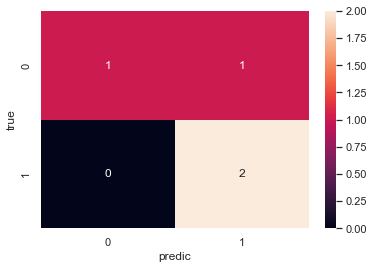

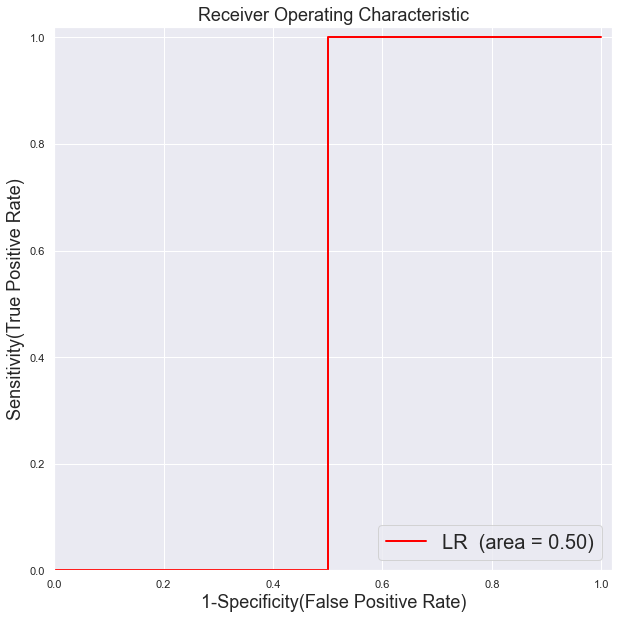

['model!!.pkl']

In [62]:
x = df[["London","New_york","Taipei"]]

y = df[["sult"]]

x1 = np.array(x)
y1 = np.array(y)
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.5,random_state=7)

#lr
# lr = LogisticRegression(random_state=3, solver='sag')
#lr = LogisticRegression(class_weight={0:.1 , 1:.3}, random_state=3, solver='sag')
lr = LogisticRegression(class_weight="balanced", random_state=2, solver='sag')
lr.fit(x_train,y_train)

#測試集的資料
print("x_test",x_test)
print("y_test",y_test)
print("預測結果：",lr.predict(x_test))
draw_confusion_matrix(y_test,lr.predict(x_test))

y_score = lr.predict_proba(x_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test,  y_score)
roc_auc = auc(fpr, tpr)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic',fontsize=18)
lw = 2
plt.plot(fpr, tpr, color='red', lw=lw, label='LR  (area = %0.2f)' % roc_auc)
#x,y軸的範圍
plt.xlim([0.0, 1.02])
plt.ylim([0.0, 1.02])
#x,y軸的名稱
plt.ylabel('Sensitivity(True Positive Rate)',fontsize=18)
plt.xlabel('1-Specificity(False Positive Rate)',fontsize=18)
#圖示
plt.legend(loc="lower right",fontsize=20)
plt.show()

joblib.dump(lr,'model!!.pkl')

<h1><center>資料正規化</center></h1>

In [63]:
df = pd.DataFrame({
    'ID': ['Alice', 'Steven', 'Alice', 'Steven','Hank','Tony','Bee','Alice','Alice'],
    'ICD': ['157.9', '220', '220', '320.3','220','320.3','157.9','239.1','157.9'],
    'DATE':['2012','2013','2014','2015','2016','1990','1992','2001','2014']
})
df

,ID,ICD,DATE
0,Alice,157.9,2012
1,Steven,220,2013
2,Alice,220,2014
3,Steven,320.3,2015
4,Hank,220,2016
5,Tony,320.3,1990
6,Bee,157.9,1992
7,Alice,239.1,2001
8,Alice,157.9,2014


In [64]:
#轉置
df=df.join(pd.get_dummies(df.ICD))    
df

,ID,ICD,DATE,157.9,220,239.1,320.3
0,Alice,157.9,2012,1,0,0,0
1,Steven,220,2013,0,1,0,0
2,Alice,220,2014,0,1,0,0
3,Steven,320.3,2015,0,0,0,1
4,Hank,220,2016,0,1,0,0
5,Tony,320.3,1990,0,0,0,1
6,Bee,157.9,1992,1,0,0,0
7,Alice,239.1,2001,0,0,1,0
8,Alice,157.9,2014,1,0,0,0


In [65]:
#同個人合併(可得到底診斷幾次)

# df['ICD'].apply(lambda x:x)         
df2=df.groupby(by='ID').sum()
df2

,157.9,220,239.1,320.3
ID,,,,
Alice,2,1,1,0
Bee,1,0,0,0
Hank,0,1,0,0
Steven,0,1,0,1
Tony,0,0,0,1


In [66]:
#不在乎幾次，單純有無得過疾病

def fun1(a):                          
    return a/a

df_new  = df2.apply(fun1, axis = 1) #次數/次數
df_new  = df_new.fillna(0)          #0除0會得到NaN，以0替換
df_new  = df_new.astype(int)        #轉整數
df_new

,157.9,220,239.1,320.3
ID,,,,
Alice,1,1,1,0
Bee,1,0,0,0
Hank,0,1,0,0
Steven,0,1,0,1
Tony,0,0,0,1


In [67]:
for column in df:
    print(column)

ID
ICD
DATE
157.9
220
239.1
320.3


In [68]:
#儲存結果
# df_new.to_csv("data3.csv", index = True)

<h1><center>switch概念</center></h1>

In [70]:
def http_error(status,status2): 
    global a
    global b
    
    if status == 400: 
        a="Bad request"
    elif status == 401: 
        a="Unauthorized"
    elif status == 403:
        a="Forbidden"
    elif status == 404:
        a="Not found"
    else:
        a="a_else!!!"   
        
    if status2 == 666:
        b="666"
    else:
        b="b_else"
        
    return (a,b)


http_error(400,666)

('Bad request', '666')